In [191]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

In [38]:
df = pd.read_csv('mobile_cleaned.csv')

In [39]:
df.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4


In [40]:
df.shape

(341, 88)

In [41]:
import seaborn as sns

In [42]:
x = df.drop('Rating',axis=1)

In [43]:
x.shape

(341, 87)

In [44]:
y = df['Rating'].values

In [45]:
y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

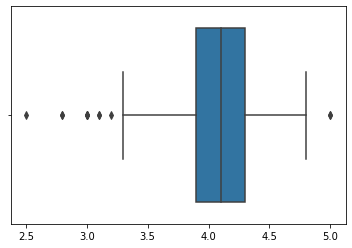

In [46]:
sns.boxplot(y)

In [47]:
threshold = 4.2
df['Class'] = (df['Rating']>=threshold).astype(np.int)

In [48]:
df['Class']

0      1
1      1
2      1
3      1
4      1
      ..
336    0
337    0
338    0
339    0
340    1
Name: Class, Length: 341, dtype: int64

In [49]:
df['Class'].value_counts(normalize = True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [50]:
Y_binarised = df['Class'].values

In [51]:
Y_binarised

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

#Standardisation

In [73]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [53]:
import matplotlib.pyplot as plt

In [54]:
R = np.random.random([100,1])

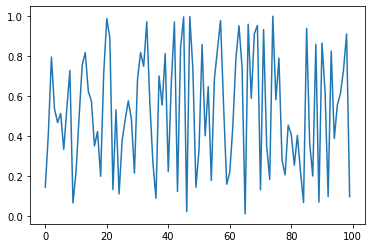

In [55]:
plt.plot(R)
plt.show()

In [56]:
np.mean(R)

0.5296310364372843

In [57]:
np.std(R)

0.29370341991641746

In [58]:
scaler = StandardScaler()

In [59]:
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [60]:
scaler.mean_

array([0.52963104])

In [61]:
RT = scaler.transform(R)

In [62]:
np.mean(RT)

-6.661338147750939e-18

In [63]:
np.std(RT)

1.0

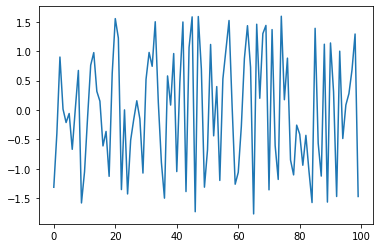

In [64]:
plt.plot(RT)
plt.show()

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, stratify= Y_binarised)

In [68]:
print(x_train.shape,x_test.shape)

(255, 87) (86, 87)


In [69]:
sc1 = StandardScaler()

In [102]:
x_scaled_train=sc1.fit_transform(x_train)

In [103]:
x_scaled_train

array([[ 1.29929126, -0.90185206,  0.03173306, ..., -0.14142136,
        -0.15523011,  0.21232515],
       [-1.16225208, -0.86697607,  1.03451971, ..., -0.14142136,
        -0.15523011,  0.21232515],
       [ 1.77523922,  0.65594214,  0.03173306, ..., -0.14142136,
        -0.15523011,  0.21232515],
       ...,
       [ 1.44058831, -0.58796815, -0.66464655, ..., -0.14142136,
        -0.15523011,  0.21232515],
       [-1.42253612,  0.50481285,  1.54984063, ..., -0.14142136,
        -0.15523011,  0.21232515],
       [ 1.06875397,  0.6791928 ,  0.97880934, ..., -0.14142136,
        -0.15523011,  0.21232515]])

In [104]:
x_scaled_test = sc1.transform(x_test)

In [105]:
x_scaled_test

array([[ 1.04644391,  1.98122975,  0.31028491, ..., -0.14142136,
        -0.15523011,  0.21232515],
       [-1.31098582,  0.74894478,  1.14594045, ..., -0.14142136,
        -0.15523011,  0.21232515],
       [-1.7200036 ,  0.74894478,  1.14594045, ..., -0.14142136,
        -0.15523011,  0.21232515],
       ...,
       [ 0.28046517, -1.47149323, -1.36102617, ..., -0.14142136,
        -0.15523011,  0.21232515],
       [-1.60101661,  0.64431681,  1.14594045, ..., -0.14142136,
        -0.15523011,  0.21232515],
       [ 0.92002024,  1.0279527 , -1.36102617, ..., -0.14142136,
        -0.15523011,  0.21232515]])

In [106]:
minmax_scaler = MinMaxScaler()

In [107]:
y_scaled_train = minmax_scaler.fit_transform(y_train.reshape(-1,1))

In [108]:
y_scaled_train.shape

(255, 1)

In [109]:
np.min(y_scaled_train)

0.0

In [110]:
y_scaled_test = minmax_scaler.transform(y_test.reshape(-1,1))

In [111]:
np.min(y_scaled_test)

0.11999999999999988

In [112]:
 scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(1,-1)))[0][0]

In [113]:
scaled_threshold

0.6800000000000002

In [114]:
Y_binarised_train=(y_scaled_train>scaled_threshold).astype('int').ravel()

In [115]:
Y_binarised_test=(y_scaled_test>scaled_threshold).astype('int').ravel()

In [116]:
Y_binarised_train

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [117]:
Y_binarised_test

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [193]:
class SigmoidNeuron:

    def __int__(self):
        self.w = None
        self.b = None

    def perceptron(self, x):
        return np.dot(x, self.w.T) +self.b

    def sigmoid(self, x):
        return 1.0/(1.0+np.exp(-x))

    def grad_w(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1-y_pred) * x

    def grad_b(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1-y_pred)

    def fit(self, X, Y, epochs = 1, learning_rate = 1, initialise = True, display_loss = False):

        if initialise:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0

        if display_loss:
            loss = {}
            
        for i in tqdm_notebook(range(epochs), total= epochs, unit = 'epoch'):
            dw = 0
            db = 0
            for x,y in zip(X,Y):
                dw += self.grad_w(x,y)
                db += self.grad_b(x,y)
            self.w -= learning_rate * dw
            self.b -= learning_rate * db

            if display_loss:
                y_pred = self.sigmoid(self.perceptron(X))
                loss[i] = mean_squared_error(y_pred, Y)

        if display_loss:
            plt.plot(list(loss.values()))
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()

    def predict(self,X):
        Y_pred= []
        for x in X:
            y_pred = self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


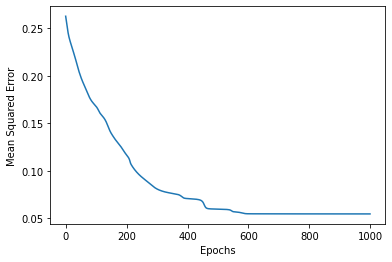

In [194]:
sn = SigmoidNeuron()
sn.fit(x_scaled_train, y_scaled_train, epochs = 1000, learning_rate = 0.01, display_loss = True)

In [186]:
y_pred_train = sn.predict(x_scaled_train)

In [187]:
y_pred_test = sn.predict(x_scaled_test)

In [188]:
y_pred_binarised_train = (y_pred_train > scaled_threshold).astype('int').ravel()
y_pred_binarised_test = (y_pred_test > scaled_threshold).astype('int').ravel()

In [189]:
accuracy_train = accuracy_score(y_pred_binarised_train, Y_binarised_train)
accuracy_test = accuracy_score(y_pred_binarised_test, Y_binarised_test)

In [139]:
print(accuracy_train, accuracy_test)

0.47843137254901963 0.5232558139534884


In [145]:
print(accuracy_train, accuracy_test)

0.5843137254901961 0.5581395348837209


In [151]:
print(accuracy_train, accuracy_test)

0.6588235294117647 0.6976744186046512


In [157]:
print(accuracy_train, accuracy_test)

0.5058823529411764 0.4418604651162791


In [163]:
print(accuracy_train, accuracy_test)

0.7176470588235294 0.7558139534883721


In [190]:
print(accuracy_train, accuracy_test)

0.7843137254901961 0.8488372093023255
